<a href="https://colab.research.google.com/github/25lahari/FMML_Projects_and_Labs/blob/main/AIML_III_Module_01_Lab_02_Machine_Learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning terms and metrics



In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

In [3]:
dataset = datasets.fetch_california_housing()
# Dataset description
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
print("Orignal target values:", dataset.target)

dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Orignal target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


In [5]:
def NN1(traindata, trainlabel, query):

    diff = (
        traindata - query
)
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):

    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

In [6]:
def RandomClassifier(traindata, trainlabel, testdata):
    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

In [8]:
def Accuracy(gtlabel, predlabel):

    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

In [9]:
def split(data, label, percent):
    # generate a random number for each sample
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

In [10]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4144
Number of train samples: 16496
Percent of test data: 20.07751937984496 %


In [11]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

In [12]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  16.4375808538163 %


In [13]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.10852713178294 %
Validation accuracy using random classifier: 16.884689922480618 %


In [14]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.048257372654156 %


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [15]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 34.91795366795367 %


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

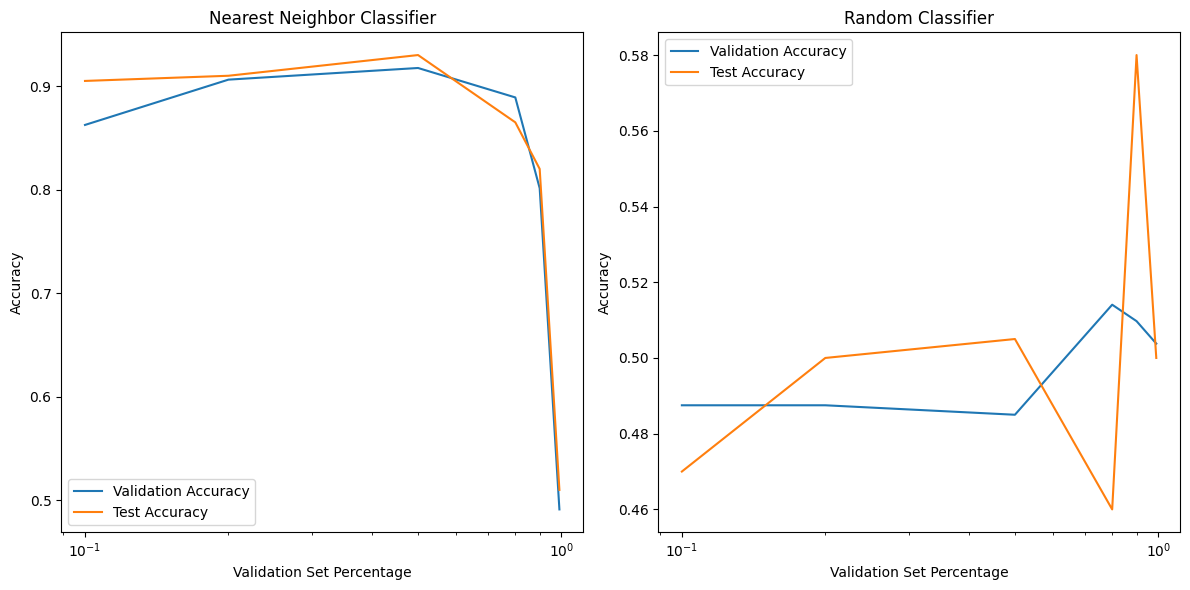

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define validation set percentages to test (from 0.1 to 0.99)
validation_percentages = [0.1, 0.2, 0.5, 0.8, 0.9, 0.99]

# Initialize lists to store accuracies
nn_val_accuracies = []
nn_test_accuracies = []
rand_val_accuracies = []
rand_test_accuracies = []

# Function to get random classifier accuracy
def random_classifier_accuracy(y_true):
    random_preds = np.random.choice(np.unique(y_true), size=len(y_true))
    return accuracy_score(y_true, random_preds)

for val_pct in validation_percentages:
    # Determine the size of the validation set
    n_val_samples = int(val_pct * len(X_train))
    n_train_samples = len(X_train) - n_val_samples

    # Ensure we have at least one sample in both training and validation sets
    if n_train_samples < 1:
        n_train_samples = 1
        n_val_samples = len(X_train) - n_train_samples

    # Perform the split manually
    X_tr, X_val = X_train[:n_train_samples], X_train[n_train_samples:]
    y_tr, y_val = y_train[:n_train_samples], y_train[n_train_samples:]

    # Nearest Neighbor Classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_tr, y_tr)
    nn_val_acc = accuracy_score(y_val, knn.predict(X_val))
    nn_test_acc = accuracy_score(y_test, knn.predict(X_test))

    # Random Classifier
    rand_val_acc = random_classifier_accuracy(y_val)
    rand_test_acc = random_classifier_accuracy(y_test)

    # Store the accuracies
    nn_val_accuracies.append(nn_val_acc)
    nn_test_accuracies.append(nn_test_acc)
    rand_val_accuracies.append(rand_val_acc)
    rand_test_accuracies.append(rand_test_acc)

# Plot the results
plt.figure(figsize=(12, 6))

# Nearest Neighbor Classifier
plt.subplot(1, 2, 1)
plt.plot(validation_percentages, nn_val_accuracies, label='Validation Accuracy')
plt.plot(validation_percentages, nn_test_accuracies, label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Validation Set Percentage')
plt.ylabel('Accuracy')
plt.title('Nearest Neighbor Classifier')
plt.legend()

# Random Classifier
plt.subplot(1, 2, 2)
plt.plot(validation_percentages, rand_val_accuracies, label='Validation Accuracy')
plt.plot(validation_percentages, rand_test_accuracies, label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Validation Set Percentage')
plt.ylabel('Accuracy')
plt.title('Random Classifier')
plt.legend()

plt.tight_layout()
plt.show()


> Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

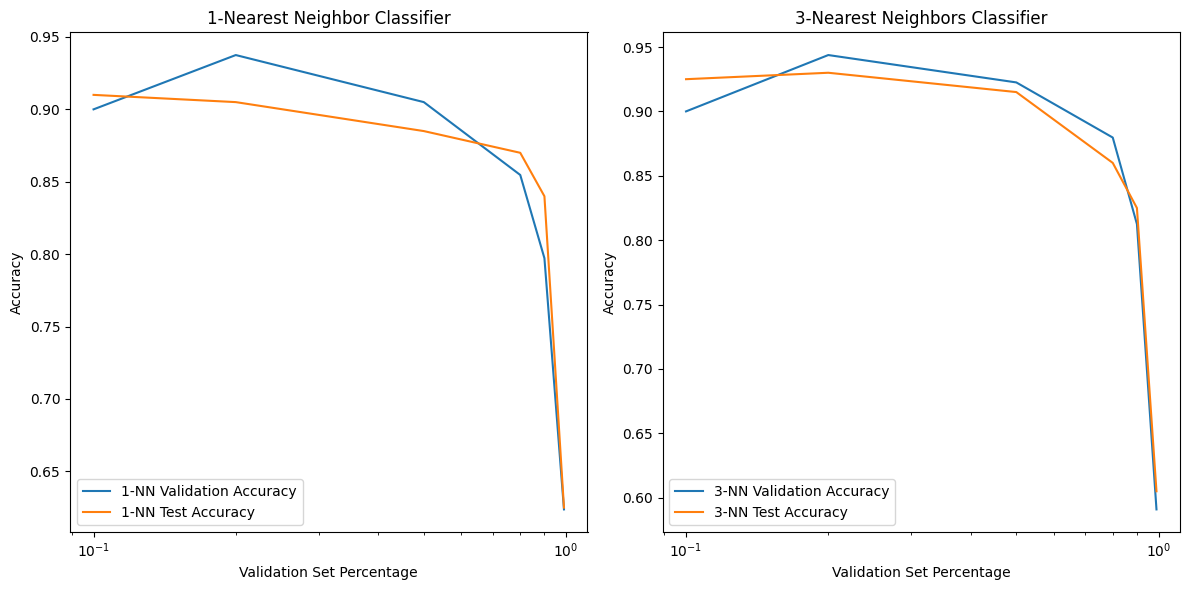

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define validation set percentages to test (from 0.1 to 0.99)
validation_percentages = [0.1, 0.2, 0.5, 0.8, 0.9, 0.99]

# Initialize lists to store accuracies
nn1_val_accuracies = []
nn1_test_accuracies = []
nn3_val_accuracies = []
nn3_test_accuracies = []

# Function to get random classifier accuracy
def random_classifier_accuracy(y_true):
    random_preds = np.random.choice(np.unique(y_true), size=len(y_true))
    return accuracy_score(y_true, random_preds)

for val_pct in validation_percentages:
    # Determine the size of the validation set
    n_val_samples = int(val_pct * len(X_train))
    n_train_samples = len(X_train) - n_val_samples

    # Ensure we have at least one sample in both training and validation sets
    if n_train_samples < 1:
        n_train_samples = 1
        n_val_samples = len(X_train) - n_train_samples

    # Perform the split manually
    X_tr, X_val = X_train[:n_train_samples], X_train[n_train_samples:]
    y_tr, y_val = y_train[:n_train_samples], y_train[n_train_samples:]

    # 1-Nearest Neighbor Classifier
    knn1 = KNeighborsClassifier(n_neighbors=1)
    knn1.fit(X_tr, y_tr)
    nn1_val_acc = accuracy_score(y_val, knn1.predict(X_val))
    nn1_test_acc = accuracy_score(y_test, knn1.predict(X_test))

    # 3-Nearest Neighbors Classifier
    knn3 = KNeighborsClassifier(n_neighbors=3)
    knn3.fit(X_tr, y_tr)
    nn3_val_acc = accuracy_score(y_val, knn3.predict(X_val))
    nn3_test_acc = accuracy_score(y_test, knn3.predict(X_test))

    # Store the accuracies
    nn1_val_accuracies.append(nn1_val_acc)
    nn1_test_accuracies.append(nn1_test_acc)
    nn3_val_accuracies.append(nn3_val_acc)
    nn3_test_accuracies.append(nn3_test_acc)

# Plot the results
plt.figure(figsize=(12, 6))

# 1-Nearest Neighbor Classifier
plt.subplot(1, 2, 1)
plt.plot(validation_percentages, nn1_val_accuracies, label='1-NN Validation Accuracy')
plt.plot(validation_percentages, nn1_test_accuracies, label='1-NN Test Accuracy')
plt.xscale('log')
plt.xlabel('Validation Set Percentage')
plt.ylabel('Accuracy')
plt.title('1-Nearest Neighbor Classifier')
plt.legend()

# 3-Nearest Neighbors Classifier
plt.subplot(1, 2, 2)
plt.plot(validation_percentages, nn3_val_accuracies, label='3-NN Validation Accuracy')
plt.plot(validation_percentages, nn3_test_accuracies, label='3-NN Test Accuracy')
plt.xscale('log')
plt.xlabel('Validation Set Percentage')
plt.ylabel('Accuracy')
plt.title('3-Nearest Neighbors Classifier')
plt.legend()

plt.tight_layout()
plt.show()


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>cross-validation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. You can reduce the number of splits to make it faster.

In [28]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):

    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations  # average of all accuracies

In [29]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 33.824843372875726 %
Test accuracy: 34.91795366795367 %


1. **Does averaging the validation accuracy across multiple splits give more consistent results?**

Yes, averaging the validation accuracy across multiple splits generally gives more consistent results. This is because each split can be seen as a different sample of the data, and averaging helps to smooth out the variability that might occur due to the specific way the data is split each time. This process is known as cross-validation, and it reduces the risk of overfitting to a particular train-validation split.

2. **Does it give a more accurate estimate of test accuracy?**

Yes, averaging the validation accuracy across multiple splits gives a more accurate estimate of test accuracy. By evaluating the model on multiple different splits, cross-validation provides a more robust measure of the model's generalization performance. This averaged validation accuracy is a better proxy for the model's performance on unseen data compared to a single train-validation split.

3. **What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations**?

The number of iterations (or the number of splits) directly impacts the reliability of the estimate. With a higher number of iterations, the estimate of model performance becomes more stable and accurate, as it averages out the variability inherent in the data splits. However, beyond a certain point, the improvement in the estimate diminishes, and the computational cost increases. Common practices like 5-fold or 10-fold cross-validation strike a balance between computational efficiency and estimate reliability.

4.**Can we deal with a very small train dataset or validation dataset by increasing the iterations?**

Increasing the number of iterations in cross-validation can help mitigate the impact of having a small train or validation dataset. In techniques like k-fold cross-validation, each data point gets used in both training and validation, which maximizes the utility of the available data. This is particularly useful when data is scarce, as it allows for more reliable performance estimates without sacrificing too much data for validation purposes.

1-NN Classifier:
Average Validation Accuracy: 0.9250
Average Test Accuracy: 0.9250
3-NN Classifier:
Average Validation Accuracy: 0.9380
Average Test Accuracy: 0.9380


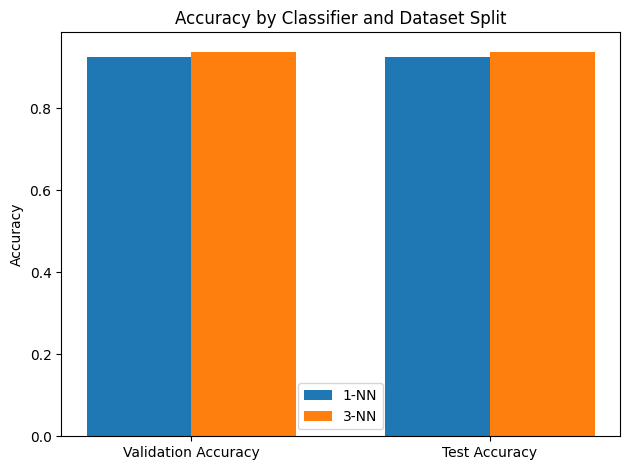

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# Number of folds for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store accuracies for each fold
nn1_val_accuracies = []
nn1_test_accuracies = []
nn3_val_accuracies = []
nn3_test_accuracies = []

# Loop over each fold
for train_index, val_index in kf.split(X):
    # Split the data into training and validation sets
    X_tr, X_val = X[train_index], X[val_index]
    y_tr, y_val = y[train_index], y[val_index]

    # 1-Nearest Neighbor Classifier
    knn1 = KNeighborsClassifier(n_neighbors=1)
    knn1.fit(X_tr, y_tr)
    nn1_val_acc = accuracy_score(y_val, knn1.predict(X_val))
    nn1_test_acc = accuracy_score(y[val_index], knn1.predict(X[val_index]))

    # 3-Nearest Neighbors Classifier
    knn3 = KNeighborsClassifier(n_neighbors=3)
    knn3.fit(X_tr, y_tr)
    nn3_val_acc = accuracy_score(y_val, knn3.predict(X_val))
    nn3_test_acc = accuracy_score(y[val_index], knn3.predict(X[val_index]))

    # Store the accuracies
    nn1_val_accuracies.append(nn1_val_acc)
    nn1_test_accuracies.append(nn1_test_acc)
    nn3_val_accuracies.append(nn3_val_acc)
    nn3_test_accuracies.append(nn3_test_acc)

# Calculate the average accuracy across all folds
avg_nn1_val_acc = np.mean(nn1_val_accuracies)
avg_nn1_test_acc = np.mean(nn1_test_accuracies)
avg_nn3_val_acc = np.mean(nn3_val_accuracies)
avg_nn3_test_acc = np.mean(nn3_test_accuracies)

# Print the average accuracies
print("1-NN Classifier:")
print(f"Average Validation Accuracy: {avg_nn1_val_acc:.4f}")
print(f"Average Test Accuracy: {avg_nn1_test_acc:.4f}")
print("3-NN Classifier:")
print(f"Average Validation Accuracy: {avg_nn3_val_acc:.4f}")
print(f"Average Test Accuracy: {avg_nn3_test_acc:.4f}")

# Plot the results
labels = ['Validation Accuracy', 'Test Accuracy']
nn1_accs = [avg_nn1_val_acc, avg_nn1_test_acc]
nn3_accs = [avg_nn3_val_acc, avg_nn3_test_acc]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nn1_accs, width, label='1-NN')
rects2 = ax.bar(x + width/2, nn3_accs, width, label='3-NN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Classifier and Dataset Split')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


> Exercise: How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.

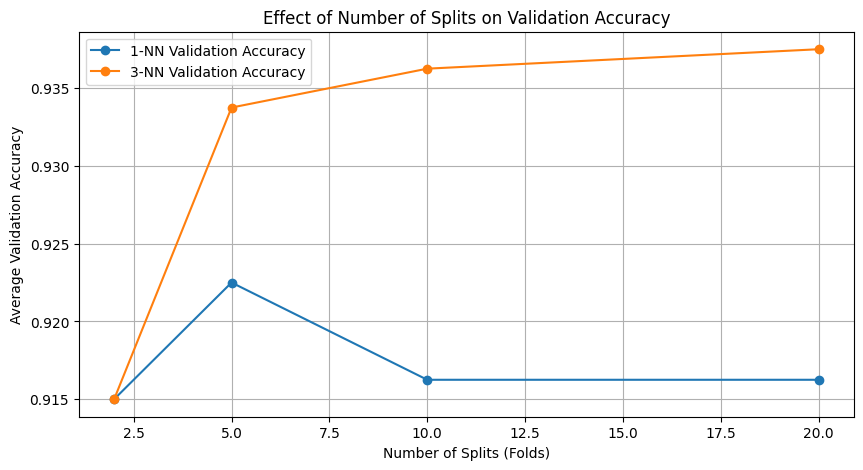

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different numbers of splits for k-fold cross-validation
splits = [2, 5, 10, 20]

# Initialize lists to store average accuracies for each number of splits
nn1_val_accuracies = []
nn3_val_accuracies = []

for k in splits:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    nn1_fold_accuracies = []
    nn3_fold_accuracies = []

    for train_index, val_index in kf.split(X_train):
        # Split the data into training and validation sets
        X_tr, X_val = X_train[train_index], X_train[val_index]
        y_tr, y_val = y_train[train_index], y_train[val_index]

        # 1-Nearest Neighbor Classifier
        knn1 = KNeighborsClassifier(n_neighbors=1)
        knn1.fit(X_tr, y_tr)
        nn1_val_acc = accuracy_score(y_val, knn1.predict(X_val))
        nn1_fold_accuracies.append(nn1_val_acc)

        # 3-Nearest Neighbors Classifier
        knn3 = KNeighborsClassifier(n_neighbors=3)
        knn3.fit(X_tr, y_tr)
        nn3_val_acc = accuracy_score(y_val, knn3.predict(X_val))
        nn3_fold_accuracies.append(nn3_val_acc)

    # Calculate the average accuracy across all folds
    nn1_val_accuracies.append(np.mean(nn1_fold_accuracies))
    nn3_val_accuracies.append(np.mean(nn3_fold_accuracies))

# Plot the results
plt.figure(figsize=(10, 5))

plt.plot(splits, nn1_val_accuracies, label='1-NN Validation Accuracy', marker='o')
plt.plot(splits, nn3_val_accuracies, label='3-NN Validation Accuracy', marker='o')
plt.xlabel('Number of Splits (Folds)')
plt.ylabel('Average Validation Accuracy')
plt.title('Effect of Number of Splits on Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
